In [37]:
from model import *

In [3]:
%load_ext autoreload
%autoreload 2

In [38]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           3950         698        2654          22         596        2927
Swap:             0           0           0


In [4]:
from lender_pipeline import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

ls = pd.read_csv('lender_dataset_sampled.csv')
# ls = pd.read_csv('lender_dataset.csv')

In [5]:
ls = drop_outliers(ls,outlier_index_lst=[2987, 27627, 15038, 19433, 704])

In [6]:
ls.shape

(51203, 105)

In [7]:
df, X = feature_engineer(ls)

In [8]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           3950         606        2750          22         593        3019
Swap:             0           0           0


In [ ]:
# from numpy.linalg import svd

In [ ]:
# U,S,V_t = svd(X) #memory error

In [ ]:
!free -m

In [9]:
re_X, imp_f = PCA_reduce(X,3)

#0 Principle Component top 5 contributors are: [10 77 76 61 14]
#1 Principle Component top 5 contributors are: [ 26   0  28 113  94]
#2 Principle Component top 5 contributors are: [18 19  7 15  6]
Reduced X shape: (51203, 3)


In [10]:
re_df = pd.DataFrame(re_X)

In [11]:
re_df.shape

(51203, 3)

In [29]:
test100=re_df.sample(100)

In [30]:
test200=re_df.sample(200)

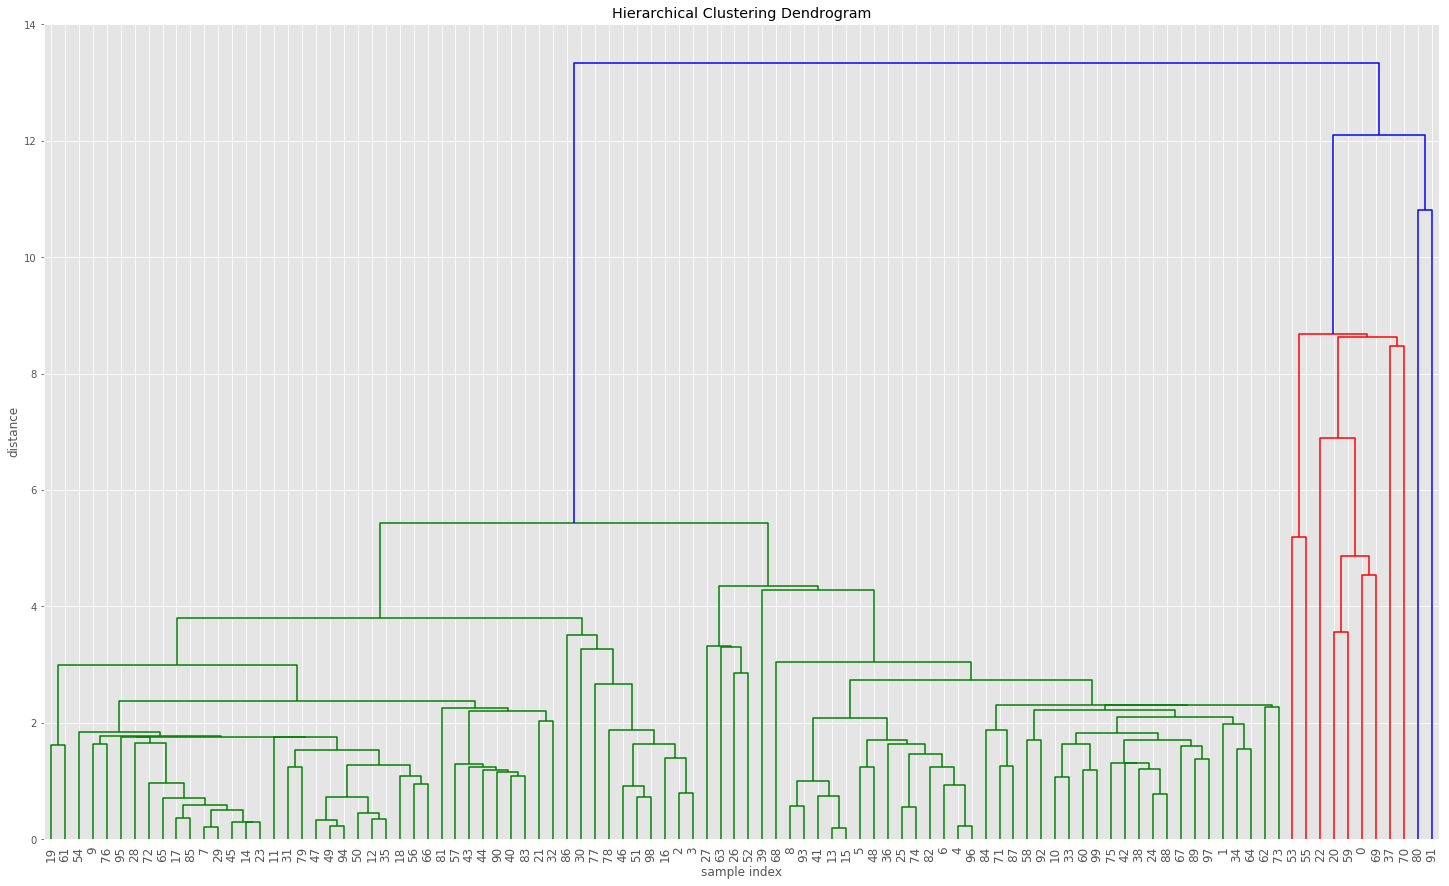

In [31]:
make_dendrogram(test100.values,'single','cityblock',color_threshold=None)

## sample100 : HCA suggests 9 clusters  is a good number

In [32]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           3950         677        2678          22         594        2949
Swap:             0           0           0


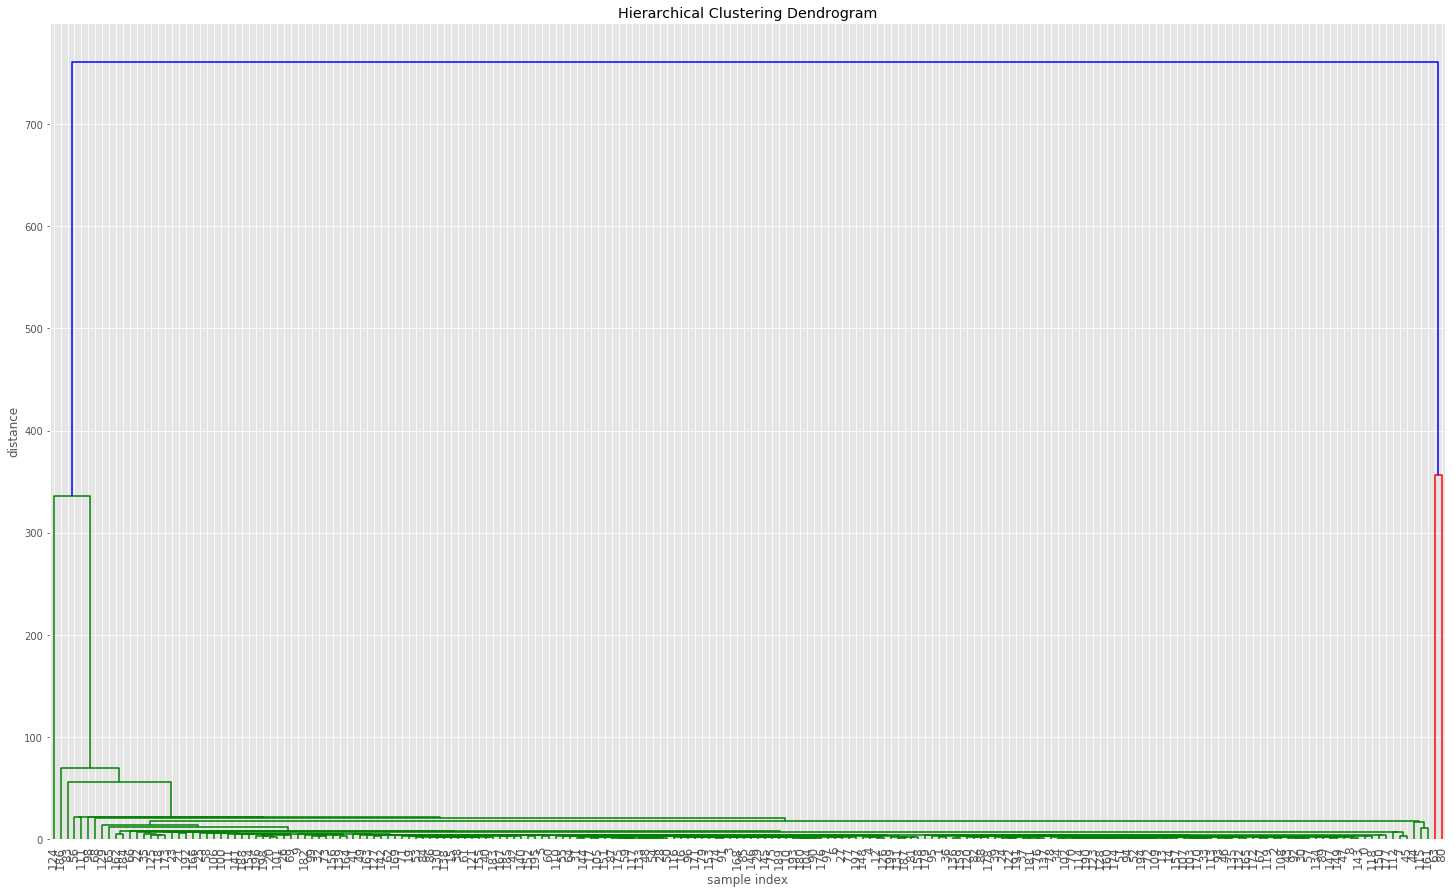

In [33]:
make_dendrogram(test200.values,'single','cityblock',color_threshold=None)

In [34]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           3950         677        2678          22         594        2948
Swap:             0           0           0


In [35]:
y, assigned_cluster = kmeans_cluster(re_X,9)

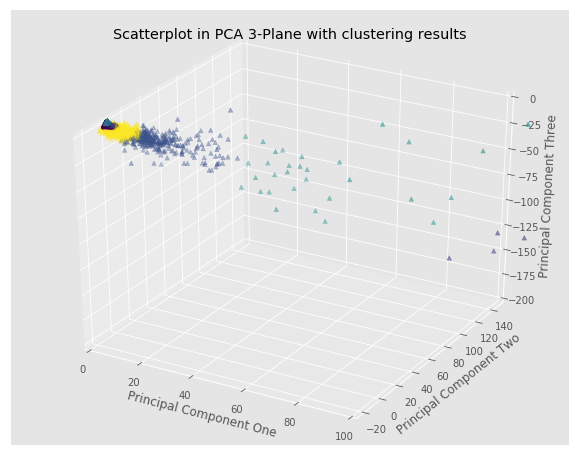

In [40]:
plot_3D_kmeans(re_X,y,xlim=(0,100),ylim=(-25,150),zlim=(-200,0))

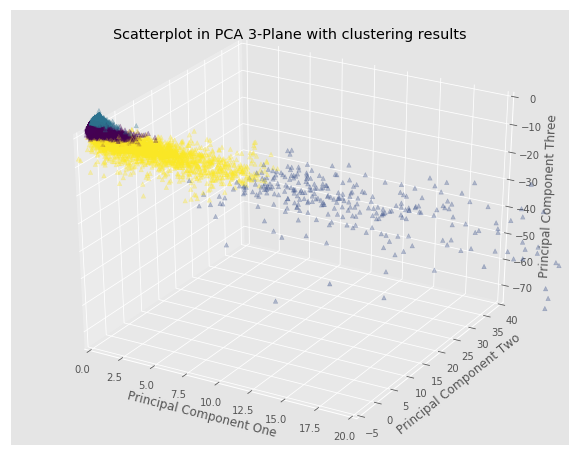

In [41]:
plot_3D_kmeans(re_X,y,xlim=(0,20),ylim=(-5,40),zlim=(-75,0))

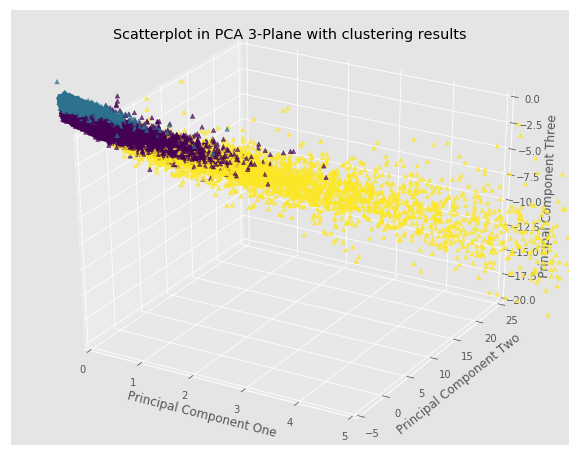

In [42]:
plot_3D_kmeans(re_X,y,xlim=(0,5),ylim=(-5,25),zlim=(-20,0))

In [43]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           3950         781        2571          22         597        2844
Swap:             0           0           0


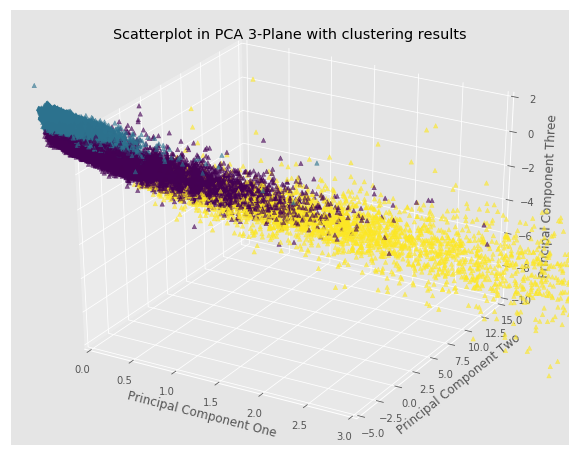

In [44]:
plot_3D_kmeans(re_X,y,xlim=(0,3),ylim=(-5,15),zlim=(-10,2))

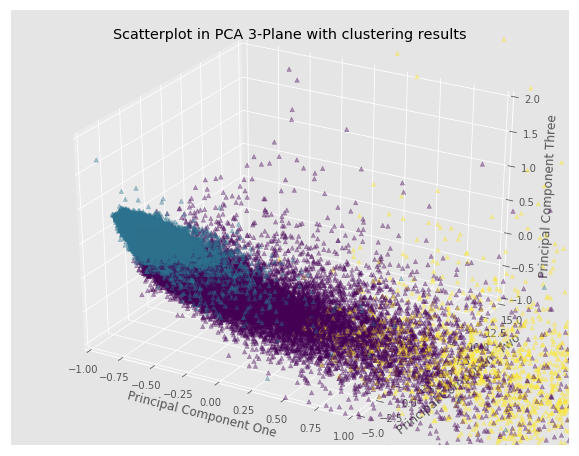

In [48]:
plot_3D_kmeans(re_X,y,xlim=(-1,1),ylim=(-5,15),zlim=(-1,2))

In [49]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           3950         909        2442          22         597        2716
Swap:             0           0           0


In [50]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [51]:
db = DBSCAN(eps=1, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


In [52]:
n_clusters_

164

In [55]:
labels.shape

(51203,)

In [57]:
re_df.shape

(51203, 3)

In [59]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           3950         980        2371          22         598        2645
Swap:             0           0           0
